In [1]:
import pandas as pd
import numpy as np

from modules.graphs import draw_series_plots, draw_histogram, draw_kde_plot, draw_time_series
from modules.graphs import draw_time_series_difference_plot, draw_histogram_of_differences, draw_cumulative_plots

from modules.stat_test import tStudent_test, Mann_Whitney_U_test

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('./prepared_datasets/based_dataset.csv')

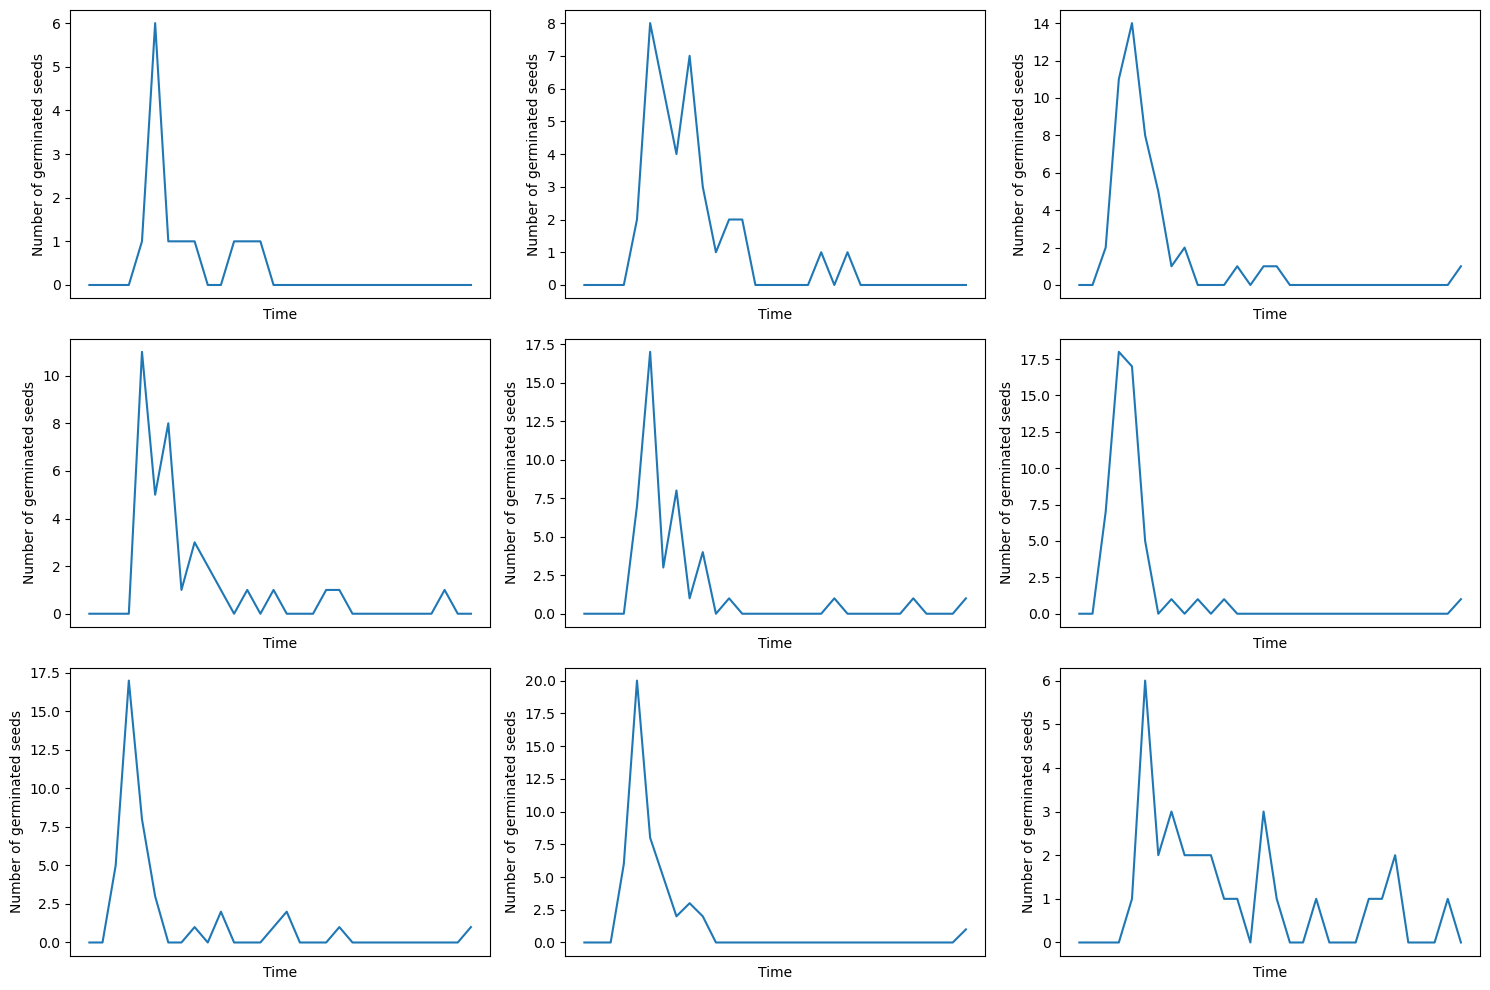

In [4]:
draw_series_plots(dataset)

In [5]:
dataset

,2022-03-03 00:00:00,2022-03-04 00:00:00,2022-03-05 00:00:00,2022-03-06 00:00:00,2022-03-07 00:00:00,2022-03-08 00:00:00,2022-03-09 00:00:00,2022-03-10 00:00:00,2022-03-11 00:00:00,2022-03-12 00:00:00,...,2022-03-23 00:00:00,2022-03-24 00:00:00,2022-03-25 00:00:00,2022-03-26 00:00:00,2022-03-27 00:00:00,2022-03-28 00:00:00,2022-03-29 00:00:00,2022-03-30 00:00:00,2022-03-31 00:00:00,target
0,0,0,0,2,5,3,0,0,0,1,...,3.0,0.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,1
1,0,0,0,1,5,5,0,0,0,0,...,1.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1
2,0,0,1,5,7,3,1,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,0,0,4,11,5,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0,0,0,0,7,12,7,5,5,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,0,0,0,11,5,8,1,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
73,0,0,0,0,7,6,2,1,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74,0,0,0,0,12,13,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
75,0,0,0,1,6,18,2,1,5,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [6]:
ts_heap = pd.read_csv('heap.csv')
ts_heap.drop('target', axis=1, inplace=True)

In [7]:
ts_post_agricultural = pd.read_csv('post_agricultural.csv')
ts_post_agricultural.drop('target', axis=1, inplace=True)

In [8]:
ts_heap = pd.DataFrame(ts_heap.sum(axis=0))
ts_heap = ts_heap.rename(columns={0: 'h'})
ts_heap

,h
2022-03-03 00:00:00,0.0
2022-03-04 00:00:00,0.0
2022-03-05 00:00:00,51.0
2022-03-06 00:00:00,339.0
2022-03-07 00:00:00,521.0
2022-03-08 00:00:00,317.0
2022-03-09 00:00:00,147.0
2022-03-10 00:00:00,82.0
2022-03-11 00:00:00,66.0
2022-03-12 00:00:00,53.0


In [9]:
ts_post_agricultural = pd.DataFrame(ts_post_agricultural.sum(axis=0))
ts_post_agricultural = ts_post_agricultural.rename(columns={0: 'p'})
ts_post_agricultural

,p
2022-03-03 00:00:00,0.0
2022-03-04 00:00:00,0.0
2022-03-05 00:00:00,1.0
2022-03-06 00:00:00,2.0
2022-03-07 00:00:00,119.0
2022-03-08 00:00:00,227.0
2022-03-09 00:00:00,131.0
2022-03-10 00:00:00,70.0
2022-03-11 00:00:00,93.0
2022-03-12 00:00:00,82.0


In [10]:
_ts = pd.concat([ts_heap, ts_post_agricultural], axis=1)
_ts

,h,p
2022-03-03 00:00:00,0.0,0.0
2022-03-04 00:00:00,0.0,0.0
2022-03-05 00:00:00,51.0,1.0
2022-03-06 00:00:00,339.0,2.0
2022-03-07 00:00:00,521.0,119.0
2022-03-08 00:00:00,317.0,227.0
2022-03-09 00:00:00,147.0,131.0
2022-03-10 00:00:00,82.0,70.0
2022-03-11 00:00:00,66.0,93.0
2022-03-12 00:00:00,53.0,82.0


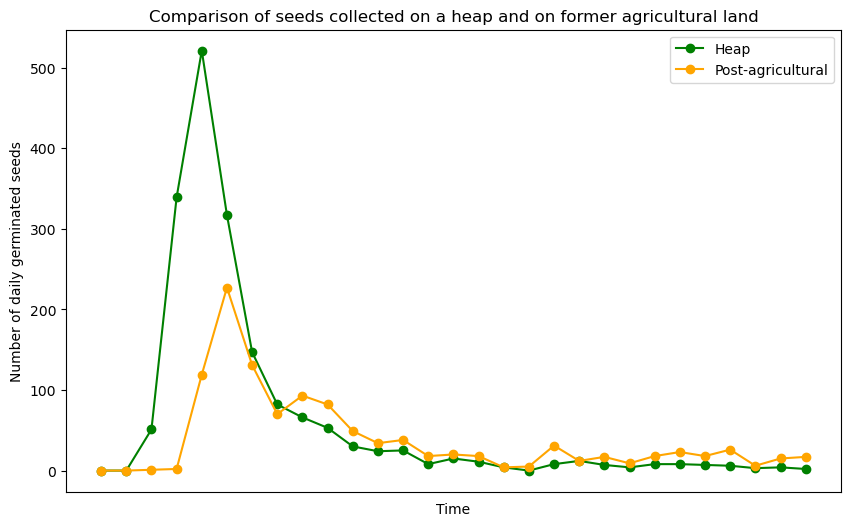

In [11]:
draw_time_series(_ts, ['h', 'p'], ['Heap', 'Post-agricultural'], 
                 'Comparison of seeds collected on a heap and on former agricultural land', 
                 'Number of daily germinated seeds')

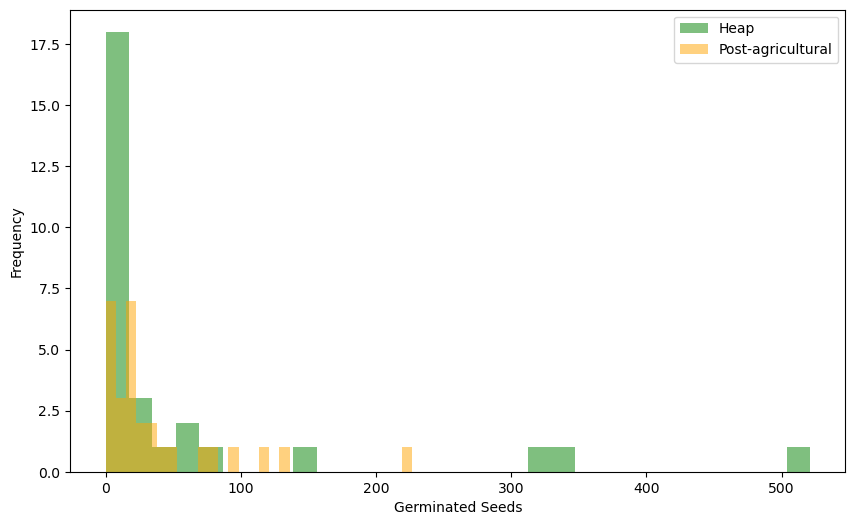

In [12]:
draw_histogram(_ts, ['h', 'p'], ['Heap', 'Post-agricultural'], 30)

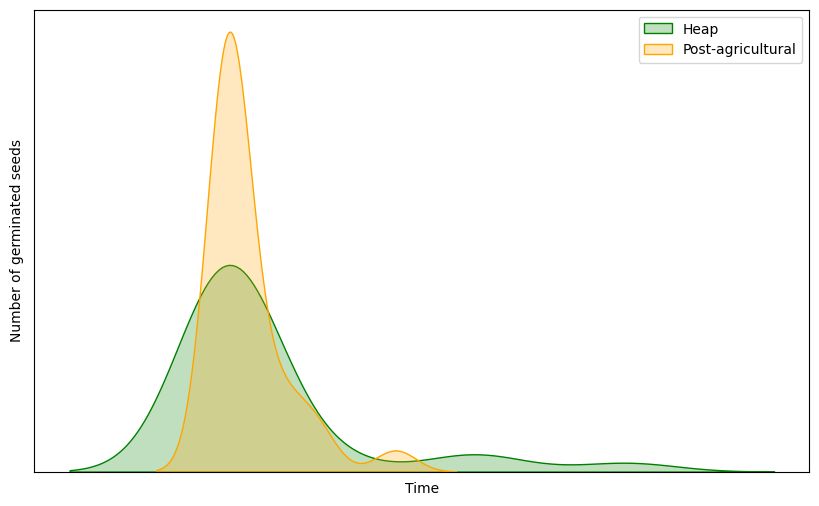

In [13]:
draw_kde_plot(_ts['h'], _ts['p'], ['Heap', 'Post-agricultural'])

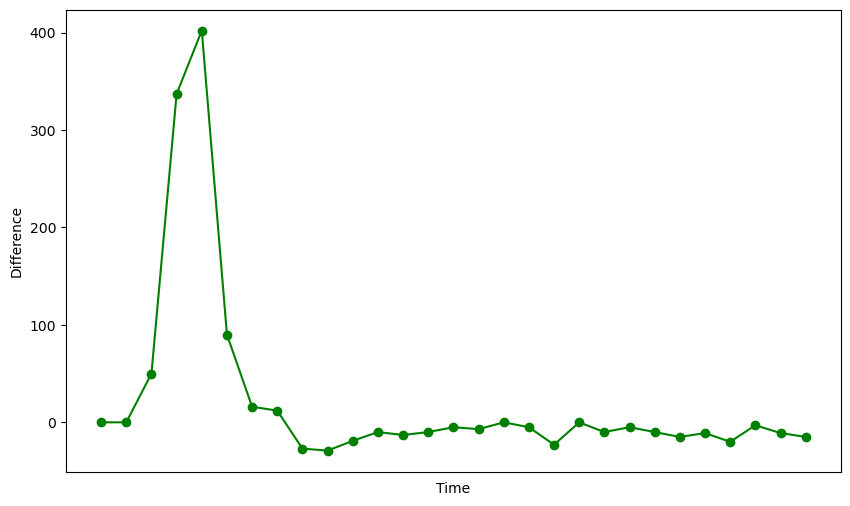

In [14]:
draw_time_series_difference_plot(_ts, ['h', 'p'], 
'The difference between the daily germination of seeds collected on a heap and those collected in post-agricultural areas')

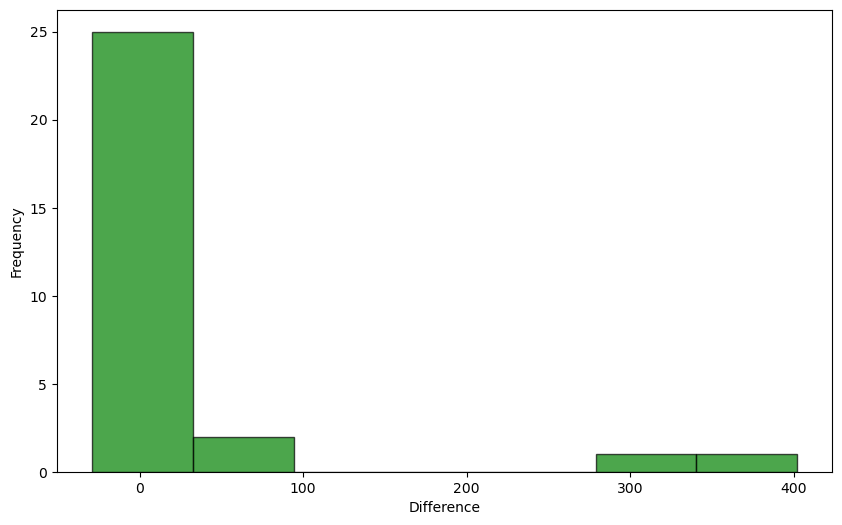

In [15]:
draw_histogram_of_differences(_ts, ['h', 'p'], ['Heap', 'Post-agricultural'], 7)

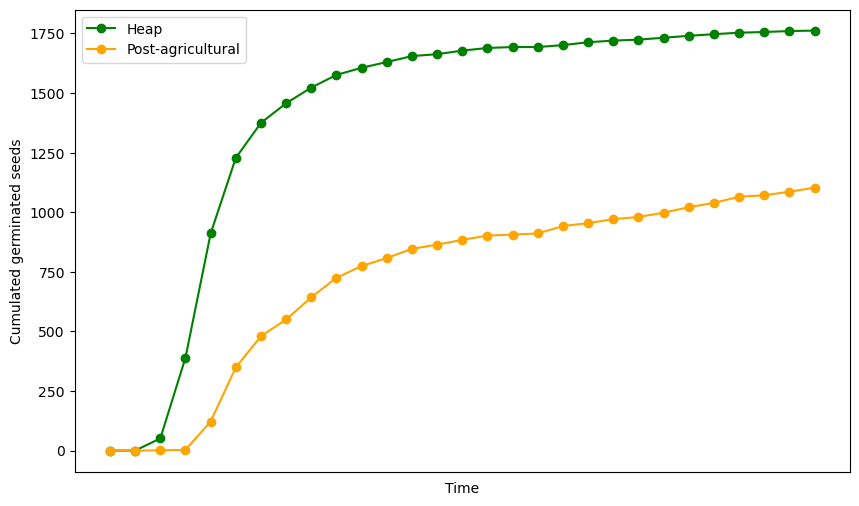

In [16]:
draw_cumulative_plots(_ts, ['h', 'p'], ['Heap', 'Post-agricultural'], 'Cumulated germinated seeds')

In [17]:
correlation_coefficient = np.corrcoef(_ts['h'], _ts['p'])[0, 1]
print("Correlation coefficient:")
print(correlation_coefficient)

Correlation coefficient:
0.625901217836216


In [18]:
tStudent_test(_ts['h'], _ts['p'])

Student's t-test for two independent samples:
Test statistic value: 0.9230972402487981
p value: 0.35991686560671476
There are no grounds to reject the null hypothesis - no significant difference between the groups.


In [20]:
Mann_Whitney_U_test(_ts['h'], _ts['p'])

Mann Whitney U test for two independent samples:
Test statistic value: 362.0
p value: 0.3666495587496228
There are no grounds to reject the null hypothesis - no significant difference between the groups.
